In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://api.covidtracking.com/v1/states/gu/daily.csv'
df = pd.read_csv(url, parse_dates=['date'])
df.head()

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-10-04,GU,2699,49057,NaN,51756,29.0,NaN,12.0,NaN,...,51756,1,0,0a3ea26589511430678dc67e0b326ca505dfdbaa,0,0,0,0,0,NaN
1,2020-10-03,GU,2699,49057,NaN,51756,29.0,NaN,12.0,NaN,...,51756,1,0,72286c8141c12652c1b506abbb78ac4a2fc98f50,0,0,0,0,0,NaN
2,2020-10-02,GU,2617,48501,NaN,51118,30.0,NaN,13.0,NaN,...,51118,1,0,c09165720bfee07c4e3620f5a5de1055645fef0b,0,0,0,0,0,NaN
3,2020-10-01,GU,2550,47998,NaN,50548,27.0,NaN,10.0,NaN,...,50548,0,0,9dfedfc103ad1912a984b5fab9ead0cc43fb50a2,0,0,0,0,0,NaN
4,2020-09-30,GU,2488,47626,NaN,50114,25.0,NaN,9.0,NaN,...,50114,2,0,eee62bbc0708ed98ffe547e44b5040f60c6170ac,0,0,0,0,0,NaN


---

- Column descriptions can be found at "https://covidtracking.com/data/api" under "Historic values for a single state"

---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 54 columns):
date                           203 non-null datetime64[ns]
state                          203 non-null object
positive                       203 non-null int64
negative                       203 non-null int64
pending                        0 non-null float64
totalTestResults               203 non-null int64
hospitalizedCurrently          147 non-null float64
hospitalizedCumulative         0 non-null float64
inIcuCurrently                 98 non-null float64
inIcuCumulative                0 non-null float64
onVentilatorCurrently          18 non-null float64
onVentilatorCumulative         0 non-null float64
recovered                      191 non-null float64
dataQualityGrade               163 non-null object
lastUpdateEt                   203 non-null object
dateModified                   203 non-null object
checkTimeEt                    203 non-null object
death                    

In [4]:
#remove columns with no data recorded, columns not necessary for analysis, 
#columns displaying the same data as others, & depreciated data
columns = ['deathConfirmed', 'deathProbable', 'hospitalized', 
         'hospitalizedCumulative', 'inIcuCumulative', 'negativeTestsAntibody', 'pending',
         'negativeTestsPeopleAntibody', 'onVentilatorCumulative',
         'positiveTestsAntigen', 'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
         'totalTestEncountersViral', 'totalTestsAntigen', 'totalTestsPeopleAntibody', 
         'totalTestsPeopleAntigen', 'hospitalizedIncrease', 'hash', 'commercialScore',
         'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
          'grade', 'totalTestResultsSource', 'state', 'lastUpdateEt', 'dateModified',
          'checkTimeEt', 'dateChecked', 'fips', 'total', 'posNeg', 'dataQualityGrade']
df_1 = df.drop(columns, axis=1)

In [5]:
df_1.head()

,date,positive,negative,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease
0,2020-10-04,2699,49057,51756,29.0,12.0,NaN,1887.0,52.0,51114.0,NaN,NaN,2697.0,51754.0,184.0,3.0,0,0,0,1
1,2020-10-03,2699,49057,51756,29.0,12.0,NaN,1887.0,51.0,51114.0,NaN,NaN,2697.0,51754.0,184.0,3.0,82,556,638,1
2,2020-10-02,2617,48501,51118,30.0,13.0,NaN,1887.0,50.0,51114.0,NaN,NaN,2615.0,51116.0,184.0,3.0,67,503,570,1
3,2020-10-01,2550,47998,50548,27.0,10.0,NaN,1866.0,49.0,50544.0,NaN,NaN,2548.0,50546.0,181.0,3.0,62,372,434,0
4,2020-09-30,2488,47626,50114,25.0,9.0,NaN,1822.0,49.0,50110.0,NaN,NaN,2486.0,50112.0,180.0,3.0,45,342,387,2


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 20 columns):
date                        203 non-null datetime64[ns]
positive                    203 non-null int64
negative                    203 non-null int64
totalTestResults            203 non-null int64
hospitalizedCurrently       147 non-null float64
inIcuCurrently              98 non-null float64
onVentilatorCurrently       18 non-null float64
recovered                   191 non-null float64
death                       197 non-null float64
totalTestsViral             137 non-null float64
positiveTestsViral          33 non-null float64
negativeTestsViral          33 non-null float64
positiveCasesViral          169 non-null float64
totalTestsPeopleViral       133 non-null float64
totalTestsAntibody          131 non-null float64
positiveTestsAntibody       131 non-null float64
positiveIncrease            203 non-null int64
negativeIncrease            203 non-null int64
totalTestResultsIncr

In [7]:
#create column with daily positive result rate
df_1['positive_rate'] = round((df_1['positiveIncrease']/df_1['totalTestResultsIncrease']) * 100, 2)

In [8]:
df_1['positive_rate'].head()

0      NaN
1    12.85
2    11.75
3    14.29
4    11.63
Name: positive_rate, dtype: float64

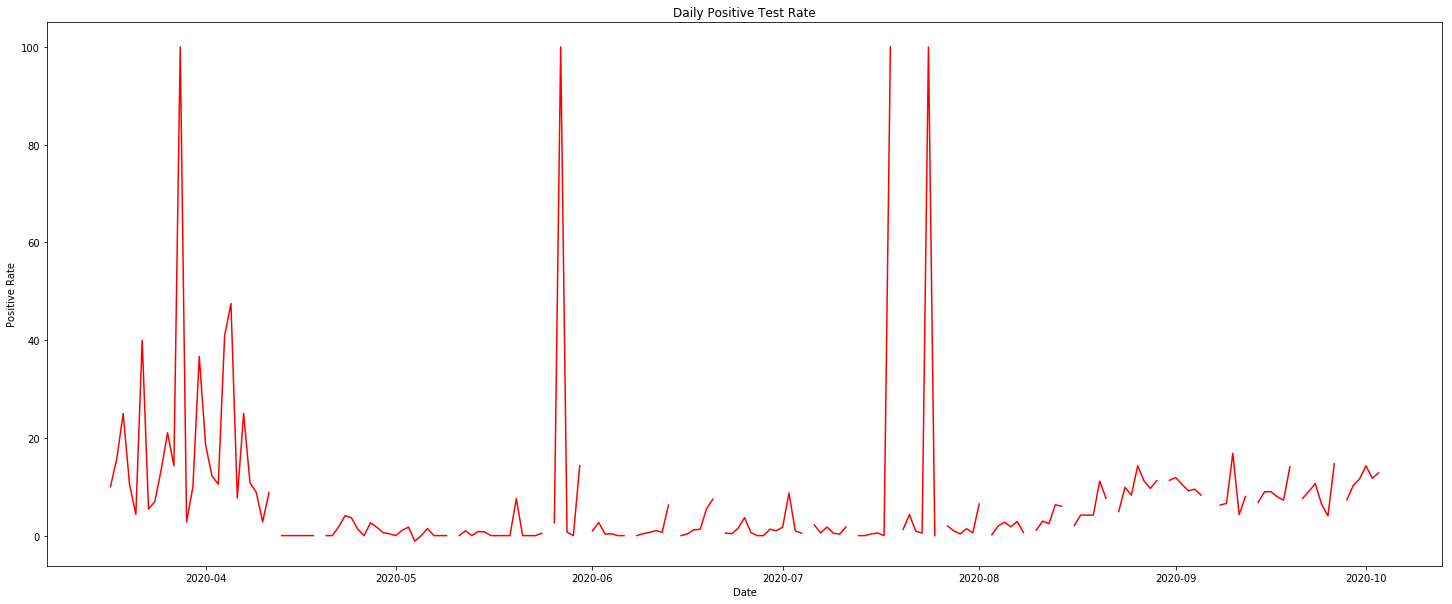

In [9]:
#plot daily positive rate by date

# Create figure and plot space
fig, ax = plt.subplots(figsize=(25, 10))

# Add x-axis and y-axis
ax.plot(df_1['date'],
        df_1['positive_rate'],
        color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Positive Rate",
       title="Daily Positive Test Rate")

plt.show()

In [10]:
df_1['positive_rate'].unique()

array([   nan,  12.85,  11.75,  14.29,  11.63,  10.27,   7.32,  14.69,
         4.04,   6.42,  10.64,   9.07,   7.58,  14.1 ,   7.25,   7.96,
         9.  ,   8.97,   6.78,   8.  ,   4.3 ,  16.83,   6.59,   6.26,
         8.27,   9.49,   9.18,  10.47,  11.87,  11.32,  11.24,   9.65,
        11.18,   9.89,   4.93,   7.65,  11.15,   4.2 ,   4.19,   2.07,
         6.01,   6.31,   2.42,   2.96,   1.1 ,   0.6 ,   2.89,   1.81,
         2.73,   2.  ,   0.19,   6.47,   0.59,   1.41,   0.37,   0.96,
         0.  , 100.  ,   0.52,   0.92,   1.26,   0.54,   0.34,   1.77,
         0.3 ,   0.51,   1.75,   0.55,   2.18,   0.49,   0.97,   8.72,
         1.71,   1.  ,   1.31,   0.63,   3.68,   1.55,   0.4 ,   7.46,
         5.51,   1.28,   1.2 ,   0.36,   6.25,   0.68,   1.02,   0.65,
         0.39,   2.67,   0.93,   0.72,   2.61,   0.48,   7.59,   0.74,
         0.85,   0.98,   1.46,  -1.12,   1.09,   0.38,   0.61,   1.72,
         2.63,   1.32,   3.64,   4.08,   1.85,   8.82,   2.82,  10.81,
      

In [17]:
df_1.loc[df_1['positive_rate']== 100.00]

,date,positive,negative,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,totalTestsViral,...,negativeTestsViral,positiveCasesViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,positive_rate
72,2020-07-24,337,19132,19469,0.0,NaN,NaN,244.0,5.0,19791.0,...,NaN,329.0,19461.0,145.0,2.0,5,0,5,0,100.0
78,2020-07-18,315,17938,18253,4.0,NaN,NaN,222.0,5.0,18244.0,...,NaN,307.0,18245.0,145.0,2.0,1,0,1,0,100.0
130,2020-05-27,170,5515,5685,1.0,NaN,NaN,143.0,5.0,5749.0,...,NaN,163.0,5685.0,54.0,1.0,1,0,1,0,100.0
190,2020-03-28,55,299,354,15.0,NaN,NaN,7.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4,0,4,0,100.0


In [12]:
#for positive_rate graph: need to remove columns with 100% positive rate, 
                         #minimal testing done and all positive results. 
                         #seems like incomplete data

In [13]:
df_1.loc[df_1['positive_rate']== 0.00]

,date,positive,negative,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,totalTestsViral,...,negativeTestsViral,positiveCasesViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,positive_rate
71,2020-07-25,337,19695,20032,1.0,NaN,NaN,244.0,5.0,19791.0,...,NaN,329.0,20024.0,145.0,2.0,0,563,563,0,0.0
79,2020-07-17,314,17938,18252,4.0,NaN,NaN,214.0,5.0,18224.0,...,NaN,306.0,18244.0,145.0,2.0,0,241,241,0,0.0
82,2020-07-14,312,17225,17537,3.0,NaN,NaN,210.0,5.0,17529.0,...,NaN,304.0,17529.0,142.0,2.0,0,195,195,0,0.0
83,2020-07-13,312,17030,17342,3.0,NaN,NaN,202.0,5.0,17334.0,...,NaN,304.0,17334.0,142.0,2.0,0,363,363,0,0.0
98,2020-06-28,248,12130,12378,1.0,NaN,NaN,179.0,5.0,11523.0,...,11284.0,240.0,12370.0,125.0,2.0,0,227,227,0,0.0
99,2020-06-27,248,11903,12151,1.0,NaN,NaN,179.0,5.0,11523.0,...,11284.0,240.0,12143.0,125.0,2.0,0,259,259,0,0.0
111,2020-06-15,185,8573,8758,NaN,NaN,NaN,169.0,5.0,8706.0,...,8531.0,177.0,8750.0,114.0,2.0,0,215,215,0,0.0
118,2020-06-08,179,7550,7729,NaN,NaN,NaN,163.0,5.0,7729.0,...,7550.0,171.0,NaN,109.0,2.0,0,266,266,0,0.0
120,2020-06-06,179,7284,7463,NaN,NaN,NaN,162.0,5.0,7116.0,...,6945.0,171.0,NaN,105.0,2.0,0,89,89,0,0.0
121,2020-06-05,179,7195,7374,NaN,NaN,NaN,162.0,5.0,7116.0,...,6945.0,171.0,NaN,105.0,2.0,0,390,390,0,0.0


In [14]:
df_1.loc[df_1['positive_rate']== -1.12]

,date,positive,negative,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,totalTestsViral,...,negativeTestsViral,positiveCasesViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,positive_rate
153,2020-05-04,149,3242,3391,NaN,NaN,NaN,125.0,5.0,NaN,...,NaN,145.0,NaN,NaN,NaN,-1,90,89,0,-1.12


In [15]:
df_1.loc[df_1['positive_rate'].isna()]

,date,positive,negative,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,totalTestsViral,...,negativeTestsViral,positiveCasesViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,positive_rate
0,2020-10-04,2699,49057,51756,29.0,12.0,NaN,1887.0,52.0,51114.0,...,NaN,2697.0,51754.0,184.0,3.0,0,0,0,1,NaN
7,2020-09-27,2354,46365,48719,30.0,9.0,NaN,1668.0,43.0,48254.0,...,NaN,2354.0,48719.0,179.0,3.0,0,0,0,0,NaN
14,2020-09-20,2117,43841,45958,36.0,19.0,NaN,1450.0,34.0,45651.0,...,NaN,2117.0,45958.0,172.0,3.0,0,0,0,0,NaN
21,2020-09-13,1891,41472,43363,50.0,11.0,NaN,1118.0,26.0,43011.0,...,NaN,1891.0,43363.0,158.0,2.0,0,0,0,1,NaN
27,2020-09-07,1671,39070,40741,57.0,14.0,NaN,744.0,18.0,40110.0,...,NaN,1671.0,40741.0,158.0,2.0,0,0,0,2,NaN
28,2020-09-06,1671,39070,40741,57.0,14.0,NaN,744.0,16.0,40110.0,...,NaN,1671.0,40741.0,158.0,2.0,0,0,0,1,NaN
35,2020-08-30,1347,36113,37460,36.0,4.0,NaN,488.0,10.0,36916.0,...,NaN,1339.0,37452.0,158.0,2.0,0,0,0,0,NaN
43,2020-08-22,767,30749,31516,14.0,3.0,NaN,394.0,7.0,31506.0,...,NaN,759.0,31508.0,155.0,2.0,0,0,0,0,NaN
50,2020-08-15,502,26594,27096,8.0,2.0,NaN,345.0,5.0,27086.0,...,NaN,494.0,27088.0,153.0,2.0,0,0,0,0,NaN
56,2020-08-09,412,24117,24529,3.0,NaN,NaN,321.0,5.0,24354.0,...,NaN,404.0,24521.0,147.0,2.0,0,0,0,0,NaN


In [ ]:
# Investigate data quality grade further

In [ ]:
# FOR PLOTTING PURPOSES OF POSITIVE RATE, CREATE NEW DF WITH:

#remove row 153: incomplete data with negative positive rate
#create new df without sundays
#remove rows with 100% positive rate
